In [ ]:
# 비지도 학습(문제집)
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load("fruits_300.npy")
fruits.shape

(300, 100, 100)

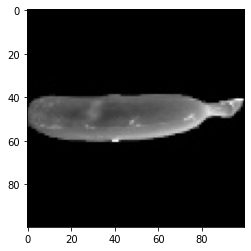

In [ ]:
plt.imshow(fruits[200], cmap='gray')

In [ ]:
# 비지도 학습(라벨링) : 평균

fruits2 = fruits.reshape(-1, 10000)
fruits2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
fruits2.shape

(300, 10000)

In [ ]:
apple = fruits2[:100]
pineapple = fruits2[100:200]
banana = fruits2[200:]

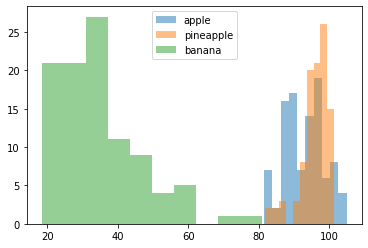

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])

<BarContainer object of 10000 artists>

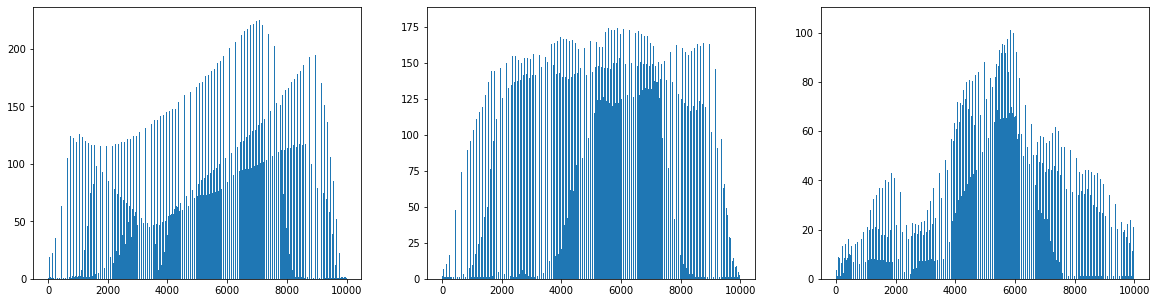

In [ ]:
fig = plt.figure(figsize = (20, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.bar(range(10000), np.mean(apple, axis = 0))
ax2.bar(range(10000), np.mean(pineapple, axis = 0))
ax3.bar(range(10000), np.mean(banana, axis = 0))

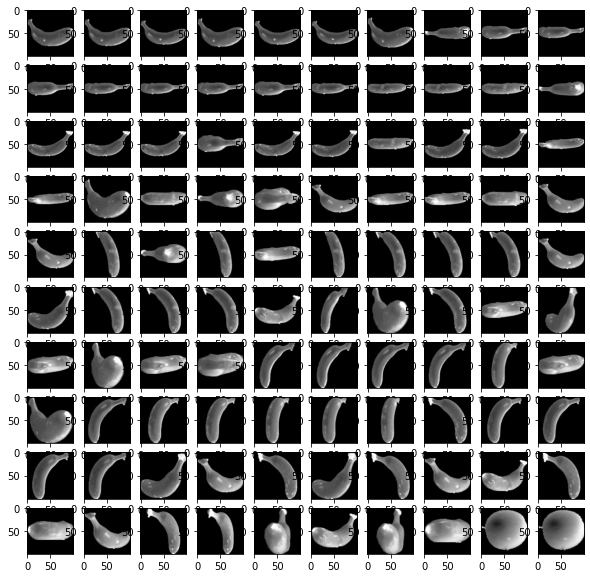

In [ ]:
sample = np.mean(banana, axis = 0).reshape(100, 100)
result = abs(fruits - sample)

result = result.reshape(300, 10000)
result = np.mean(result, axis = 1)
result = np.argsort(result)[:100]

fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[result[i*10+j]], cmap = 'gray')
plt.show()

In [ ]:
# pytorch(둘다 2차원)
# 문제집(2차원), 정답지(1차원)
from sklearn.cluster import KMeans

fruits = np.load("fruits_300.npy")
fruits2 = fruits.reshape(-1, 10000)
fruits2.shape

(300, 10000)

In [ ]:
km = KMeans(n_clusters=3)
km.fit(fruits2)

KMeans(n_clusters=3)

In [ ]:
target = km.labels_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(fruits2, target)

RandomForestClassifier(oob_score=True)

In [ ]:
rf.oob_score_

0.99

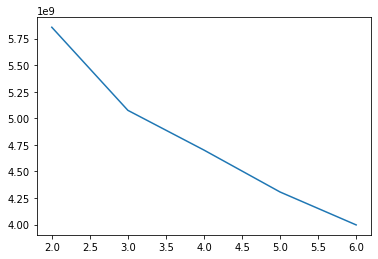

In [ ]:
# 이 과일 사진에 몇 종류의 과일이 있는지 모를 때

box = [] # binbox
for n in range(2, 7):
    km = KMeans(n_clusters=n)
    km.fit(fruits2)
    box.append(km.inertia_)

plt.plot(range(2,7), box)

In [ ]:
# 주성분 분석 - 특징을 가지고 학습습
fruits2.shape

1958400

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fruits2의 주성분 50개를 찾아서 fruits_pca변수에 넣어라라
fruits_pca = pca.fit_transform(fruits2)

In [ ]:
fruits2.shape

(300, 10000)

In [ ]:
fruits_pca.shape

(300, 2)

In [ ]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(fruits_pca, target)
rf.oob_score_

0.9933333333333333

In [ ]:
sum(pca.explained_variance_ratio_)

0.5229877245800595

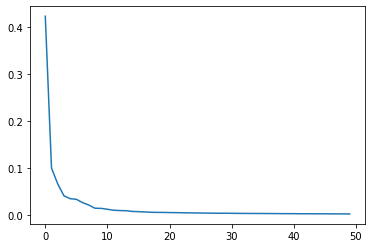

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
km = KMeans(n_clusters=3)
km.fit(fruits_pca)
target = km.labels_

In [ ]:
df = pd.DataFrame(fruits_pca, columns = ['c1', 'c2'])
df['target'] = target
df

,c1,c2,target
0,-2778.417795,-1571.873818,2
1,-3078.273651,-2739.270410,2
2,-2620.610729,-1486.870560,2
3,-3113.717711,-2530.022821,2
4,-2520.647051,-2330.647907,2
...,...,...,...
295,4955.542497,-1145.276759,0
296,5746.358051,1927.059829,0
297,5182.128683,121.760516,0
298,3987.988006,-70.881602,0


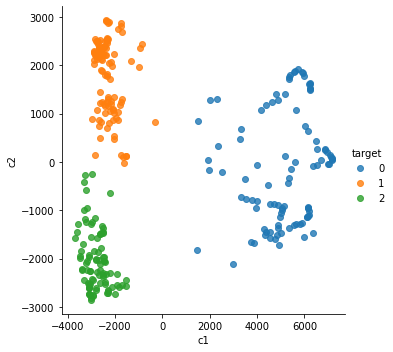

In [ ]:
import seaborn as sns

sns.lmplot(x='c1', y='c2', data=df, hue='target',
           fit_reg=False)

In [ ]:
# 인공신경망

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

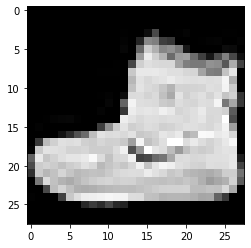

In [ ]:
plt.imshow(train_input[0], cmap = 'gray')

In [ ]:
train_target[0]

9

In [ ]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
train_scaled = train_input.reshape(-1, 784) / 255
val_scaled = val_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

In [ ]:
# 딥러닝 > 머신러닝

from sklearn.neighbors import KNeighborsClassifier

# KNN : 85.5%
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.8554

In [ ]:
# RF : 87.6%
rf = RandomForestClassifier()
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

0.8764

In [ ]:
model = keras.Sequential() # 신경망 설계하기 위한 도화지
model.add(keras.layers.Dense(10, activation = 'softmax', input_shape = (784,)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 어떻게 학습
# 최적화 함수
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam')

# 학습 // 에폭이 한번 끝날때마다 검증데이터로 쪽지 시험험
hist = model.fit(train_scaled, train_target, epochs = 20,
                 validation_data = (val_scaled, val_target))

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.7941 - val_loss: 0.5032 - val_accuracy: 0.8310
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4652 - accuracy: 0.8412 - val_loss: 0.4880 - val_accuracy: 0.8303
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4384 - accuracy: 0.8498 - val_loss: 0.4596 - val_accuracy: 0.8422
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4240 - accuracy: 0.8533 - val_loss: 0.4471 - val_accuracy: 0.8488
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4139 - accuracy: 0.8571 - val_loss: 0.4427 - val_accuracy: 0.8483
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4068 - accuracy: 0.8603 - val_loss: 0.4374 - val_accuracy: 0.8517
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4018 - accuracy: 0.8610 - val_loss: 0.4323 - val_accuracy:

In [ ]:
# 인공신경망 : 84.5%
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8449


[0.4511457085609436, 0.8449000120162964]

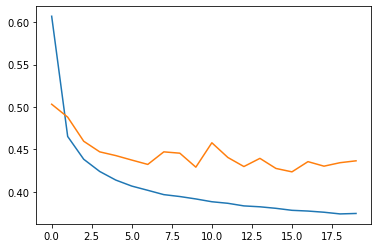

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])